### Step 1: Create a DB

In [1]:
import pymongo

In [2]:
DEFAULT_CONNECTION_URL = "mongodb://localhost:27017/"
DB_NAME = "CKS"

# Establish a connection with MongoDB
client = pymongo.MongoClient(DEFAULT_CONNECTION_URL)

# create a DB
dataBase = client[DB_NAME]

In [3]:
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

**connect = True** means that the connection to MongoDB is established! 

In [4]:
dataBase

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'CKS')

DataBase is successfully created! However until now, we are still not able to find the database in the MongoDB unless we have created first document inside it. So, currently there is no document in the Db, hence it is not visible now.

In [5]:
# check the existing list of DBs
client.list_database_names()

['admin', 'config', 'local']

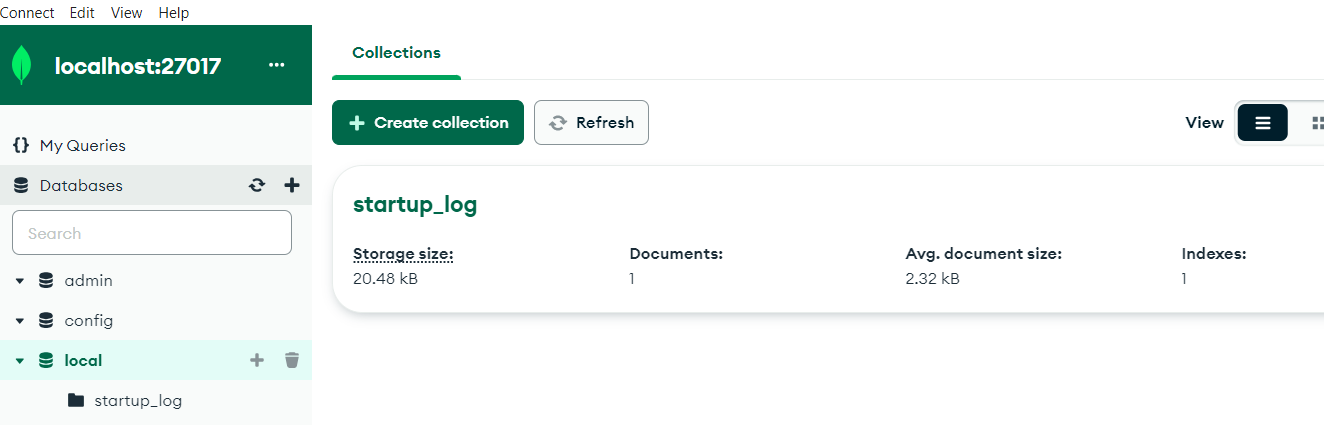

In [13]:
# Let's verify whether we have the database in the list or not
# we'll use the following function:

def checkExistence_DB(DB_NAME, client):
    """Verify the existence of DB"""
    DBList = client.list_database_names()
    if DB_NAME in DBList:
        print(f"DB: '{DB_NAME}' exists")
        return True
    print(f"DB: '{DB_NAME}'not yet present OR no collection is present in the DB")
    return False

_ = checkExistence_DB(DB_NAME=DB_NAME, client=client)

DB: 'CKS' exists


### Step 2: Create a collection (Table)

In [9]:
COLLECTION_NAME = 'Test_CKS1'
collection = dataBase[COLLECTION_NAME]

In [12]:
# verify the existence of the database

def checkExistence_COL(COLLECTION_NAME, DB_NAME, db):
    """verify the existence of collection name in a database"""
    collection_list = db.list_collection_names()
    
    if COLLECTION_NAME in collection_list:
        print(f"Collection: '{COLLECTION_NAME}' in DataBase: '{DB_NAME}' exists")
        return True
    print(f"Collection: '{COLLECTION_NAME}' in DataBase: '{DB_NAME}' does not exist OR \n\
    no documents are present in the collection")
    return False

_ = checkExistence_COL(COLLECTION_NAME=COLLECTION_NAME, DB_NAME=DB_NAME, db=dataBase)

Collection: 'Test_CKS1' in DataBase: 'CKS' exists


### Step3: Insert a record in the collection

In [10]:
record = {'Name':'Chee Kai Sin',
         'Height': '161cm',
         'Course': 'MongoDB Learning'}

collection.insert_one(record)

InsertOneResult(ObjectId('65698f2b3ea931b44d46b9ed'), acknowledged=True)

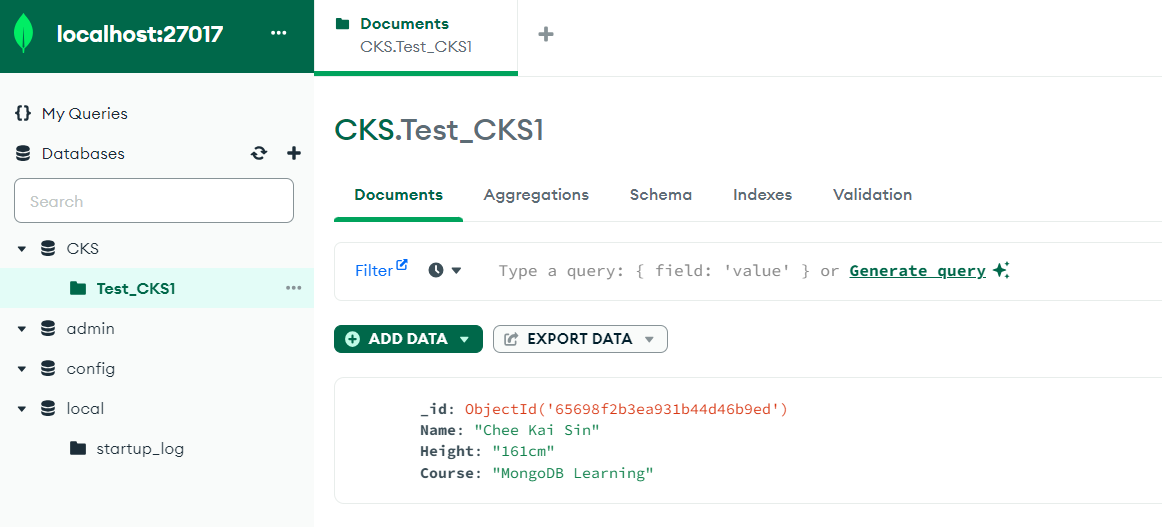

### Step3: Insert multiple records in the collection

In [16]:
list_of_record = [
    {'Name':'Natasha Wang',
     'Height': '179cm',
     'Course': 'MySQL Study'},

    {'Name':'Max Chong',
     'Height': '175cm',
     'Course': 'JavaScript'},

    {'Name':'Felicia Lim',
     'Height': '168cm',
     'Course': 'PreUniversity Learning'}]

rec = collection.insert_many(list_of_record)

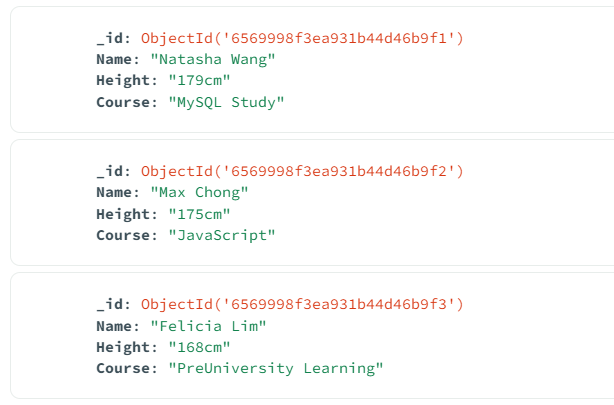

In [18]:
# let's print the unique ID of the record that have inserted

inserted_IDs = rec.inserted_ids

for idx, unique_ids in enumerate(inserted_IDs):
    print(f"{idx}.{unique_ids}")

0.6569998f3ea931b44d46b9f1
1.6569998f3ea931b44d46b9f2
2.6569998f3ea931b44d46b9f3


In [20]:
# we can also override the unique IDs by giving a user defined

COLLECTION_NAME = 'Test_CKS2'
faculties = dataBase[COLLECTION_NAME]

list_of_records_user_defined_id = [
    {"_id" : "1",
    "CompanyName" : "Nutek",
    "Faculty": "FKP"},
    
    {"_id" : "2",
    "CompanyName" : "Dematic",
    "Faculty": "FKEKK"}
]

faculties_record = faculties.insert_many(list_of_records_user_defined_id)

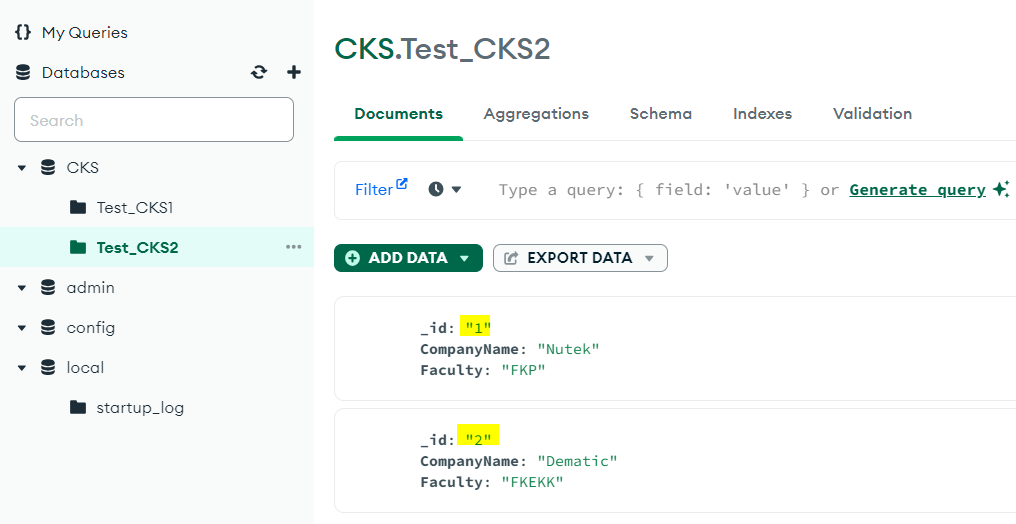

### Step 5: Find a method in MongoDB

In [21]:
find_first_record = faculties.find_one()

print(f"The first record of collection: \n {COLLECTION_NAME} is = \n {find_first_record}")

The first record of collection: 
 Test_CKS2 is = 
 {'_id': '1', 'CompanyName': 'Nutek', 'Faculty': 'FKP'}


In [22]:
# Find all the records at once present in the record with all the fields
all_record = faculties.find()

for idx, record in enumerate(all_record):
    print(f"{idx} : {record}")

0 : {'_id': '1', 'CompanyName': 'Nutek', 'Faculty': 'FKP'}
1 : {'_id': '2', 'CompanyName': 'Dematic', 'Faculty': 'FKEKK'}


In [24]:
# find all the records at once present in the record with SPECIFIC fields
all_records = faculties.find({}, {"Faculty"})

for idx, record in enumerate(all_records):
    print(f"{idx} : {record}")

0 : {'_id': '1', 'Faculty': 'FKP'}
1 : {'_id': '2', 'Faculty': 'FKEKK'}


### Step 6: Query or Filter out data in MongoDB

In [26]:
for i in faculties.find({"Faculty":"FKP"}):
    print(i)

{'_id': '1', 'CompanyName': 'Nutek', 'Faculty': 'FKP'}


In [27]:
# $gt stands for "greater than
# $gt:1 means greater than 1 

for i in faculties.find({'_id':{'$gt':'1'}}):
    print(i)

{'_id': '2', 'CompanyName': 'Dematic', 'Faculty': 'FKEKK'}


In [28]:
query1 = {"_id" : "1"}

results = faculties.find(query1)
for data in results:
    print(data)

{'_id': '1', 'CompanyName': 'Nutek', 'Faculty': 'FKP'}


In [30]:
query2 = {"_id": {"$gt":"1"}}

results = faculties.find(query2)
for data in results:
    print(data)

{'_id': '2', 'CompanyName': 'Dematic', 'Faculty': 'FKEKK'}


### Step 7: Delete one or many documents in MongoDB

In [31]:
# Lets add some random data in faculties

random_data = [
    {'_id':'3', 'CompanyName':'PGL', 'Faculty':'FKP'},
    {'_id':'4', 'CompanyName':'Dematic', 'Faculty':'FKE'},
    {'_id':'5', 'CompanyName':'Pactera', 'Faculty':'FKEKK'},
    {'_id':'6', 'CompanyName':'Google', 'Faculty':'FTMK'},
    {'_id':'7', 'CompanyName':'HP', 'Faculty':'FKP'},
]

faculties.insert_many(random_data)

InsertManyResult(['3', '4', '5', '6', '7'], acknowledged=True)

In [33]:
# delete one document in faculties
query_to_delete = {"Faculty" : "FKE"}
    
faculties.delete_one(query_to_delete)

DeleteResult({'n': 1, 'ok': 1.0}, acknowledged=True)

In [34]:
for i in faculties.find({"_id":{"$gte":"4"}}):
    print(i)

{'_id': '5', 'CompanyName': 'Pactera', 'Faculty': 'FKEKK'}
{'_id': '6', 'CompanyName': 'Google', 'Faculty': 'FTMK'}
{'_id': '7', 'CompanyName': 'HP', 'Faculty': 'FKP'}


In [35]:
faculties.delete_many({"_id":{"$gte":"4"}})

DeleteResult({'n': 3, 'ok': 1.0}, acknowledged=True)

In [37]:
# delete multiple record
multi_query_to_delete = {"_id": {"$gte": "3"}}

faculties.delete_many(multi_query_to_delete)

DeleteResult({'n': 1, 'ok': 1.0}, acknowledged=True)

In [38]:
# In order to delete all the documents present in the collection, just pass an empty dictionary 
faculties.delete_many({})

DeleteResult({'n': 2, 'ok': 1.0}, acknowledged=True)

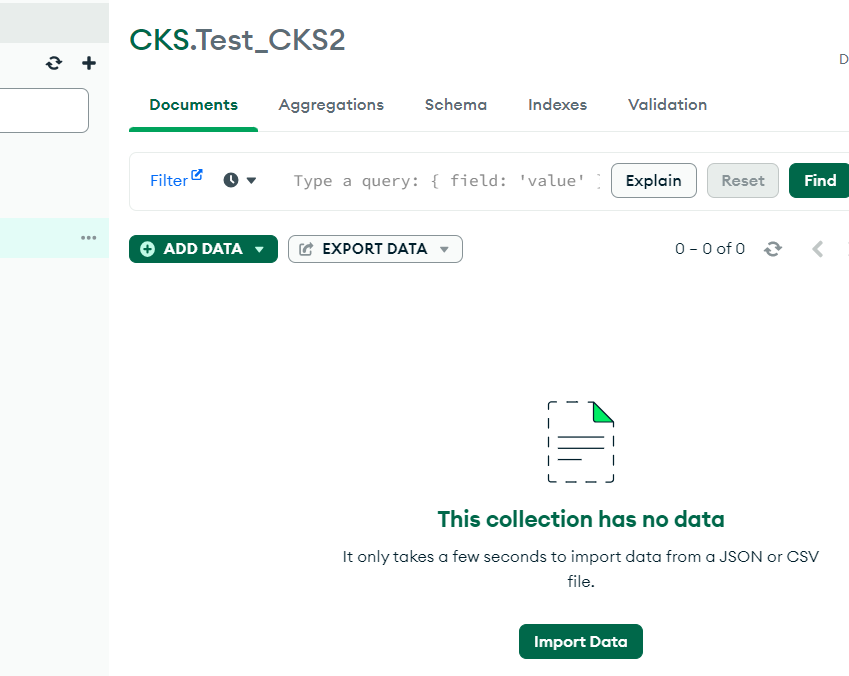

### Step 8: Drop the entire collection

In [39]:
faculties.drop()

In [40]:
# verify whether the collection still exist or not after dropping it 
COLLECTION_NAME = 'Test_CKS2'
DB_NAME = "CKS"

_ = checkExistence_COL(COLLECTION_NAME=COLLECTION_NAME, DB_NAME=DB_NAME, db=dataBase)

Collection: 'Test_CKS2' in DataBase: 'CKS' does not exist OR 
    no documents are present in the collection


### Step 9: Update

In [43]:
COLLECTION_NAME = 'Test_CKS1'

products = dataBase[COLLECTION_NAME]

all_record = products.find()

for idx, record in enumerate(all_record):
    print(f"{record}\n")

{'_id': ObjectId('65698f2b3ea931b44d46b9ed'), 'Name': 'Chee Kai Sin', 'Height': '161cm', 'Course': 'MongoDB Learning'}

{'_id': ObjectId('656998e13ea931b44d46b9ee'), 'Name': 'Natasha Wang', 'Height': '179cm', 'Course': 'MySQL Study'}

{'_id': ObjectId('656998e13ea931b44d46b9ef'), 'Name': 'Max Chong', 'Height': '175cm', 'Course': 'JavaScript'}

{'_id': ObjectId('656998e13ea931b44d46b9f0'), 'Name': 'Felicia Lim', 'Height': '168cm', 'Course': 'PreUniversity Learning'}

{'_id': ObjectId('6569998f3ea931b44d46b9f1'), 'Name': 'Natasha Wang', 'Height': '179cm', 'Course': 'MySQL Study'}

{'_id': ObjectId('6569998f3ea931b44d46b9f2'), 'Name': 'Max Chong', 'Height': '175cm', 'Course': 'JavaScript'}

{'_id': ObjectId('6569998f3ea931b44d46b9f3'), 'Name': 'Felicia Lim', 'Height': '168cm', 'Course': 'PreUniversity Learning'}

{'_id': '1', 'CompanyName': 'Nutek', 'Faculty': 'FKP'}

{'_id': '2', 'CompanyName': 'Dematic', 'Faculty': 'FKEKK'}



In [44]:
present_data = {'Height': '175cm'}
new_data = {"$set":{'Height':'188cm'}}

In [47]:
products.update_many(present_data,new_data)

UpdateResult({'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [48]:
all_record = products.find()

for idx, record in enumerate(all_record):
    print(f"{record}\n")

{'_id': ObjectId('65698f2b3ea931b44d46b9ed'), 'Name': 'Chee Kai Sin', 'Height': '161cm', 'Course': 'MongoDB Learning'}

{'_id': ObjectId('656998e13ea931b44d46b9ee'), 'Name': 'Natasha Wang', 'Height': '179cm', 'Course': 'MySQL Study'}

{'_id': ObjectId('656998e13ea931b44d46b9ef'), 'Name': 'Max Chong', 'Height': '188cm', 'Course': 'JavaScript'}

{'_id': ObjectId('656998e13ea931b44d46b9f0'), 'Name': 'Felicia Lim', 'Height': '168cm', 'Course': 'PreUniversity Learning'}

{'_id': ObjectId('6569998f3ea931b44d46b9f1'), 'Name': 'Natasha Wang', 'Height': '179cm', 'Course': 'MySQL Study'}

{'_id': ObjectId('6569998f3ea931b44d46b9f2'), 'Name': 'Max Chong', 'Height': '188cm', 'Course': 'JavaScript'}

{'_id': ObjectId('6569998f3ea931b44d46b9f3'), 'Name': 'Felicia Lim', 'Height': '168cm', 'Course': 'PreUniversity Learning'}

{'_id': '1', 'CompanyName': 'Nutek', 'Faculty': 'FKP'}

{'_id': '2', 'CompanyName': 'Dematic', 'Faculty': 'FKEKK'}



### Step 9: Set Limit to view N records

In [50]:
# to view the first 3 records
N_records = 3

N_record = products.find().limit(N_records)

for ids, record in enumerate(N_record):
    print(f"{record}\n")

{'_id': ObjectId('65698f2b3ea931b44d46b9ed'), 'Name': 'Chee Kai Sin', 'Height': '161cm', 'Course': 'MongoDB Learning'}

{'_id': ObjectId('656998e13ea931b44d46b9ee'), 'Name': 'Natasha Wang', 'Height': '179cm', 'Course': 'MySQL Study'}

{'_id': ObjectId('656998e13ea931b44d46b9ef'), 'Name': 'Max Chong', 'Height': '188cm', 'Course': 'JavaScript'}

